# Imports

In [40]:
# install additional packages if running on Emscripten
import platform

notebook_platform = platform.uname()
if notebook_platform.system == "Emscripten":
    import piplite

    await piplite.install(["openpyxl", "seaborn"])

In [41]:
from enum import Enum
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks", {"axes.grid": True})

# Detector data

In [42]:
this_file = pathlib.Path().absolute()
data_dir = this_file.parent / "data"
data_dir

PosixPath('/home/grzanka/workspace/tld_let_calibration/data')

In [43]:
radiation = Enum("rad_type", "proton Co60")
detector = Enum("detector", "mcp mts")

In [44]:
df_eff = pd.read_csv(data_dir / "interim" / "proton_eff.csv")
df_eff

,detector,energy_MeV,pmma_wheel_steps,det_id,eff
0,mts,4.92,6895,61,0.985627
1,mts,4.92,6895,62,0.984895
2,mts,4.92,6895,63,0.980375
3,mts,4.92,6895,64,0.993604
4,mts,4.92,6895,65,0.976298
...,...,...,...,...,...
126,mcp,55.00,0,2,0.838465
127,mcp,55.00,0,3,0.843554
128,mcp,55.00,0,4,0.842029
129,mcp,55.00,0,5,0.845122


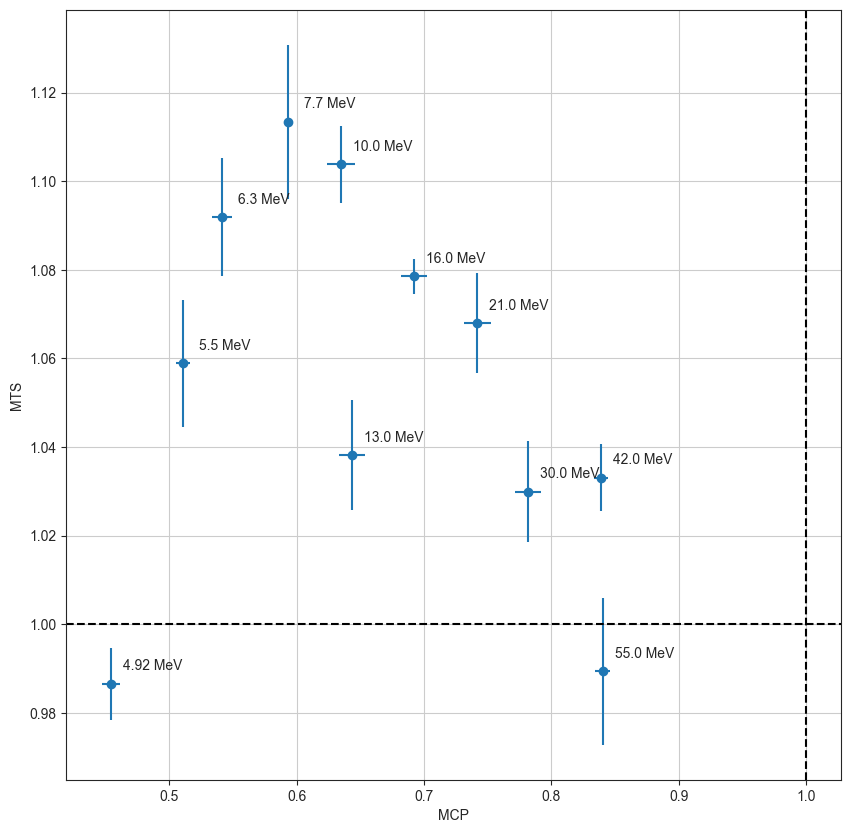

In [45]:
df_scatter = df_eff.groupby(["energy_MeV", "detector"]).eff.mean()
df_scatter_err = df_eff.groupby(["energy_MeV", "detector"]).eff.std()

fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(
    x=df_scatter[:, detector.mcp.name],
    y=df_scatter[:, detector.mts.name],
    xerr=df_scatter_err[:, detector.mcp.name],
    yerr=df_scatter_err[:, detector.mts.name],
    fmt="o",
)
ax.set_xlabel("MCP")
ax.set_ylabel("MTS")

# Add text labels over each point
for x, y, label in zip(
    df_scatter[:, detector.mcp.name], df_scatter[:, detector.mts.name], df_scatter_err.loc[:, detector.mcp.name].index
):
    ax.annotate(f"{label} MeV", (x, y), textcoords="offset points", xytext=(30, 10), ha="center")

ax.axvline(1, color="black", linestyle="--")
ax.axhline(1, color="black", linestyle="--")

# ax.set_xlim(0.4, 1.2)
# ax.set_ylim(0.4, 1.2)
# ax.set_ylim(0, None)

In [46]:
for name, df in df_eff.groupby(["detector", "energy_MeV"]):
    eff_perc_err = 100 * df.eff.std() / df.eff.mean()
    print(f"{name[0]}, {name[1]} MeV: eff = {df.eff.mean():.2f} +- {eff_perc_err:.2f}%")

mcp, 4.92 MeV: eff = 0.45 +- 1.63%
mcp, 5.5 MeV: eff = 0.51 +- 1.08%
mcp, 6.3 MeV: eff = 0.54 +- 1.44%
mcp, 7.7 MeV: eff = 0.59 +- 0.49%
mcp, 10.0 MeV: eff = 0.64 +- 1.72%
mcp, 13.0 MeV: eff = 0.64 +- 1.57%
mcp, 16.0 MeV: eff = 0.69 +- 1.52%
mcp, 21.0 MeV: eff = 0.74 +- 1.44%
mcp, 30.0 MeV: eff = 0.78 +- 1.29%
mcp, 42.0 MeV: eff = 0.84 +- 0.67%
mcp, 55.0 MeV: eff = 0.84 +- 0.72%
mts, 4.92 MeV: eff = 0.99 +- 0.83%
mts, 5.5 MeV: eff = 1.06 +- 1.35%
mts, 6.3 MeV: eff = 1.09 +- 1.22%
mts, 7.7 MeV: eff = 1.11 +- 1.56%
mts, 10.0 MeV: eff = 1.10 +- 0.79%
mts, 13.0 MeV: eff = 1.04 +- 1.19%
mts, 16.0 MeV: eff = 1.08 +- 0.36%
mts, 21.0 MeV: eff = 1.07 +- 1.06%
mts, 30.0 MeV: eff = 1.03 +- 1.11%
mts, 42.0 MeV: eff = 1.03 +- 0.73%
mts, 55.0 MeV: eff = 0.99 +- 1.67%


In [47]:
df_eff.dtypes

detector             object
energy_MeV          float64
pmma_wheel_steps      int64
det_id                int64
eff                 float64
dtype: object

Text(0, 0.5, 'Efficiency')

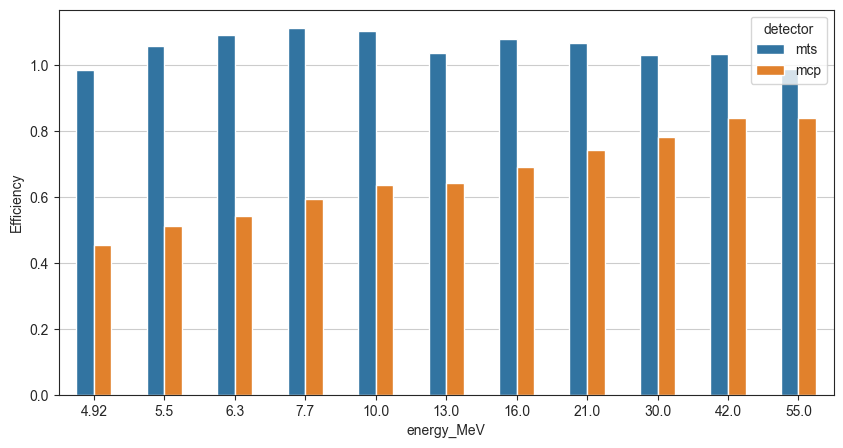

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(df_eff, x="energy_MeV", y="eff", hue="detector", errorbar=None, width=0.5, ax=ax)
ax.set_ylabel("Efficiency")

Text(0, 0.5, 'Relative error [%]')

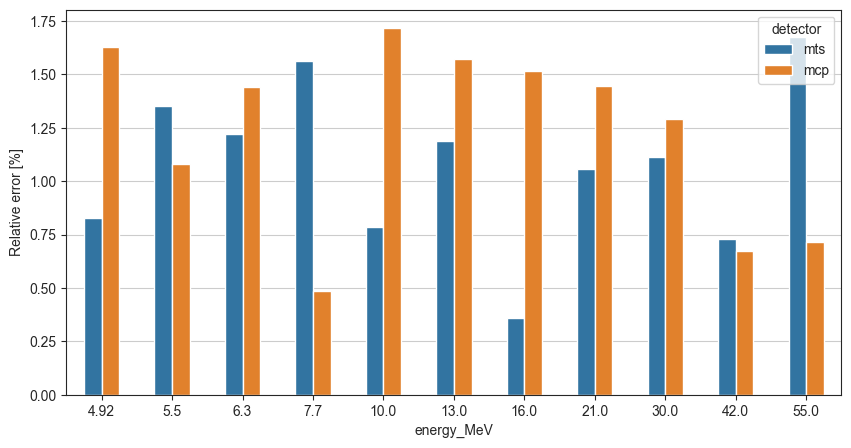

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    df_eff,
    x="energy_MeV",
    y="eff",
    hue="detector",
    estimator=lambda x: 100 * x.std() / x.mean(),
    errorbar=None,
    width=0.5,
    ax=ax,
)
ax.set_ylabel("Relative error [%]")